# __EDA__

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

pd.options.display.max_columns = None


__Read the data__

In [14]:
hr = pd.read_csv('aug_train.csv')
hr

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


__Let the target be words, 1 stand for job changed and 0 is not changed, for a better interpretability__

In [15]:
hr_target = hr.copy()

def candidates(x) :
    if x == 1 :
        x = 'Job Changed'
    else :
        x = 'Not Changed'
    return x

hr_target['target'] = hr_target['target'].map(candidates)
hr_target.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,Job Changed
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,Not Changed
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,Not Changed
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,Job Changed
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,Not Changed


In [4]:
hr_target['target'].value_counts()

Not Changed    14381
Job Changed     4777
Name: target, dtype: int64

## __Candidates / Target__

Number of Missing Values: 0


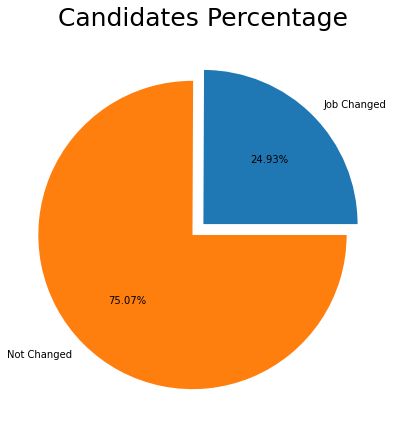

In [5]:
print("Number of Missing Values:", hr['target'].isna().sum())

values = list(hr_target['target'].value_counts().sort_values().values)
labels = list(hr_target['target'].value_counts().sort_values().index)
explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, explode = explode,
        autopct=lambda p:f'{p:.2f}%')
plt.title('Candidates Percentage', fontsize=25)
plt.tight_layout()
plt.show()



__It can be seen that the data of candidates is imbalanced, will be balanced using some methods known to machine learning models later in modeling__

## __City__
__[Categorical Variable](https://www.formpl.us/blog/categorical-data)__

Number of Missing Values: 0


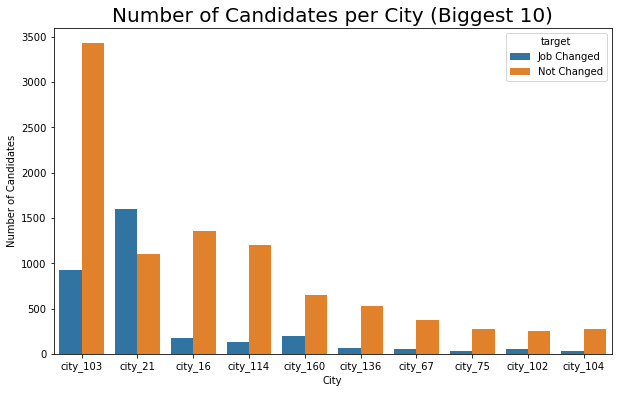

In [6]:
print("Number of Missing Values:", hr_target['city'].isna().sum())

plt.figure(figsize=(10,6))
city = sns.countplot(x = 'city', hue = hr_target['target'], data = hr_target, order = hr_target['city'].value_counts().index[:10])
# plt.annotate()
city.set_ylabel('Number of Candidates')
city.set_xlabel('City')
city.set_title('Number of Candidates per City (Biggest 10)', fontsize=20)
# plt.xticks(rotation=45)
plt.show()


__"City" is a categorical variable and has no missing values. As for the graph, it showed us the biggest 5 cities of where the candidates came from. The largest number of candidates who wanted to change their jobs were from city_21__

In [7]:
display(hr.loc[hr.city == 'city_103', 'city_development_index'][:1])
display(hr.loc[hr.city == 'city_21', 'city_development_index'][:1])
display(hr.loc[hr.city == 'city_16', 'city_development_index'][:1])
display(hr.loc[hr.city == 'city_114', 'city_development_index'][:1])
display(hr.loc[hr.city == 'city_160', 'city_development_index'][:1])

0    0.92
Name: city_development_index, dtype: float64

2    0.624
Name: city_development_index, dtype: float64

34    0.91
Name: city_development_index, dtype: float64

15    0.926
Name: city_development_index, dtype: float64

6    0.92
Name: city_development_index, dtype: float64

__City development index is a measure of level of development in cities. The index of "city_21" is 0.624. that's probably normal, because probably the reason behind it is the people want to have a better life by keep on changing their jobs. but, surprisingly, even people from high city index still want to change their jobs. There are more than just salary or better life behind it__

## __City Development Index__
__[Continuous Variable](https://www.sciencedirect.com/topics/computer-science/continuous-variable)__

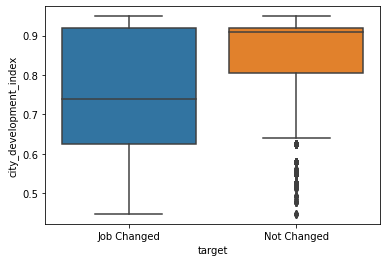

In [9]:
sns.boxplot(x=hr_target['target'], y=hr_target['city_development_index'])
plt.show()

__From this plot, we can clearly see that most of the candidates who don't change their jobs are from the cities that index between 0.8 to 0.9 but the candidates who actually change their fields lie between 0.6 to 0.9.
It can also mean that if the index of the cities development is above 0.85 there is a higher chance that the candidates won't change their respective jobs.__

Number of Missing Values: 0


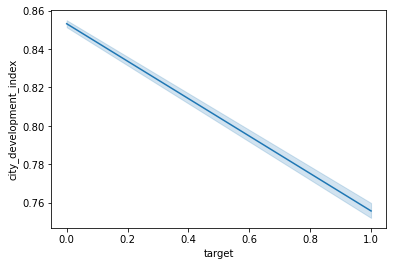

In [8]:
print("Number of Missing Values:", hr['city_development_index'].isna().sum())

sns.lineplot(x='target', y='city_development_index',data=hr)
plt.show() 

 __Here's a simpler representation of candidates with their respective city index. It can be seen that the candidates from cities with low development index tend to look for a job change and vice versa.__

__A continous Variable, and has no missing values__
<br>
**Here's [How to Calculate the CDI](https://en.wikipedia.org/wiki/City_development_index#:~:text=The%20City%20Development%20Index%20was,level%20of%20development%20in%20cities.&text=It%20was%20invented%20by%20Dr,analysis%20of%20city%20indicators%20data.)**

**Below is the table for the formula**

| Index | Formula   |
|------|------|
|   Infrastructure  | 25 x Water connections + 25 x Sewerage + 25 x Electricity + 25 x Telephone|
|   Waste  | Wastewater treated x 50 + Formal solid waste disposal x 50|
|   Health  | (Life expectancy - 25) x 50/60 + (32 - Child mortality) x 50/31.92|
|   Education  | Literacy x 25 + Combined enrolment x 25 |
|Product	|(log City Product - 4.61) x 100/5.99|
|   City Development  | (Infrastructure index + Waste index + Education index + Health index + City Product index)/5|

### __Gender__
__[Categorical Variable](https://www.formpl.us/blog/categorical-data)__

Number of Missing Values: 4508


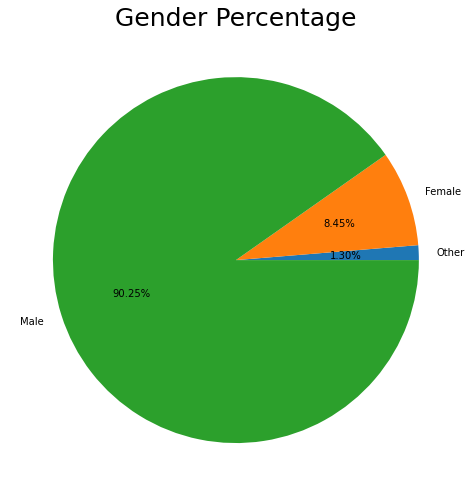

In [16]:
print("Number of Missing Values:", hr['gender'].isna().sum())

values = list(hr_target['gender'].value_counts().sort_values().values)
labels = list(hr_target['gender'].value_counts().sort_values().index)


plt.figure(figsize=(7,7))
plt.pie(values, labels=labels,
        autopct=lambda p:f'{p:.2f}%')
plt.title('Gender Percentage', fontsize=25)
plt.tight_layout()
plt.show()


__Gender data appear to be imbalanced. More than 90% of the candidates are male. This is in accordance with the social stigma that men who have to work to make ends meet in the household. What does not make sense is that there are genders other than male and female. Therefore, at the time of data cleaning, this "other" gender will be categorized as male.__

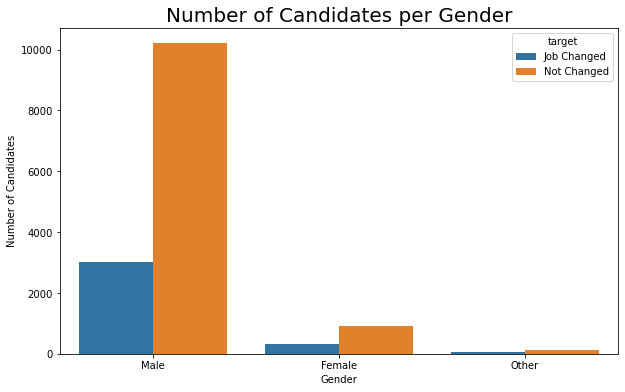

In [12]:
plt.figure(figsize=(10,6))
gender = sns.countplot(x = 'gender', hue = hr_target['target'], data = hr_target, order = hr_target['gender'].value_counts().index)
# plt.annotate()
gender.set_ylabel('Number of Candidates')
gender.set_xlabel('Gender')
gender.set_title('Number of Candidates per Gender', fontsize=20)

plt.show()


__This graph shows that, although many are looking to find new jobs, there are more who choose to stay with their current jobs. However, the ratio of men to other genders is very far away, this is because it is usually men who have to provide for their families__

### __Relevant Experience__
__[Binary Variable](https://www.statisticshowto.com/binary-variable-2/)__

Number of Missing Values: 0


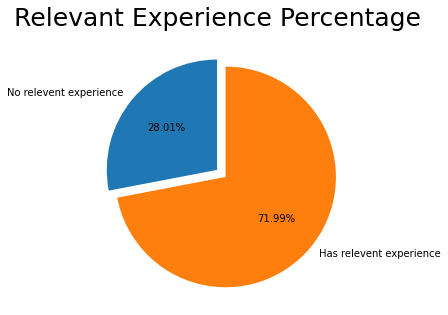

In [23]:
print("Number of Missing Values:", hr['relevent_experience'].isna().sum())

values = list(hr_target['relevent_experience'].value_counts().sort_values().values)
labels = list(hr_target['relevent_experience'].value_counts().sort_values().index)
explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, explode = explode,
        startangle=90, autopct=lambda p:f'{p:.2f}%')
plt.title('Relevant Experience Percentage', fontsize = 25)
plt.tight_layout()
plt.show()



__The data of relevant experience is imbalanced, there are more that has relevant experience__

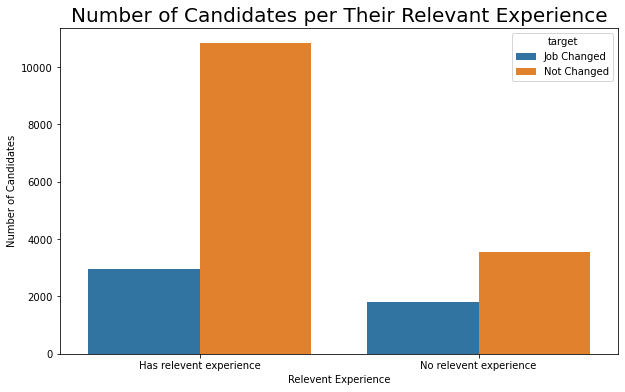

In [17]:
plt.figure(figsize=(10,6))
exp = sns.countplot(x = 'relevent_experience', hue = hr_target['target'], data = hr_target, order = hr_target['relevent_experience'].value_counts().index)
# plt.annotate()
exp.set_ylabel('Number of Candidates')
exp.set_xlabel('Relevent Experience')
exp.set_title('Number of Candidates per Their Relevant Experience', fontsize=20)
# plt.xticks(rotation=45)
plt.show()



__There was no conspicuous finding between relevant experienced and not relevant experienced candidates. Although there are many candidates that have relevant experience, who wish to change jobs, it turns out that there are many more who choose not to.__

### __Enrolled University__
__[Categorical Variable](https://www.formpl.us/blog/categorical-data)__

Number of Missing Values: 386


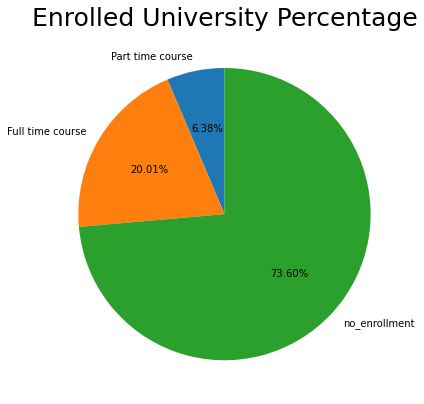

In [25]:
print("Number of Missing Values:", hr['enrolled_university'].isna().sum())

values = list(hr_target['enrolled_university'].value_counts().sort_values().values)
labels = list(hr_target['enrolled_university'].value_counts().sort_values().index)


plt.figure(figsize=(6,6))
plt.pie(values, labels=labels,
        startangle=90, autopct=lambda p:f'{p:.2f}%')
plt.title('Enrolled University Percentage', fontsize = 25)
plt.tight_layout()
plt.show()



__The data of enrolled university is imbalanced, with 73.60% candidates from the "no enrollment" category. That's probably because those candidates want to participate in the company's training to increase their skills.__

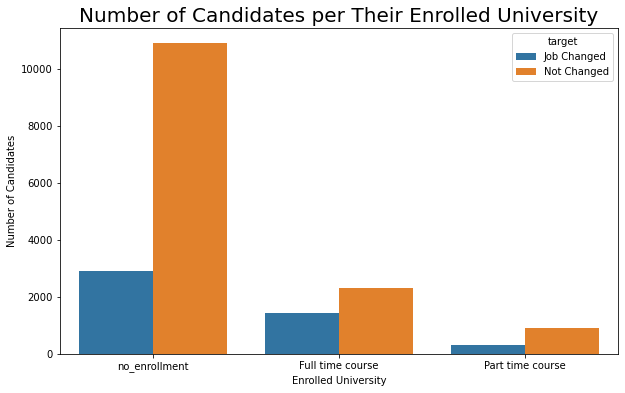

In [18]:
plt.figure(figsize=(10,6))
exp = sns.countplot(x = 'enrolled_university', hue = hr_target['target'], data = hr_target, order = hr_target['enrolled_university'].value_counts().index)
# plt.annotate()
exp.set_ylabel('Number of Candidates')
exp.set_xlabel('Enrolled University')
exp.set_title('Number of Candidates per Their Enrolled University', fontsize=20)
# plt.xticks(rotation=45)
plt.show()



__Candidates from the "no enrollment" category are the ones who want to change jobs the most, however, the strange thing is that this kind of candidate has an even higher number in terms of not wanting to change jobs.__

### __Education Level__
__[Ordinal Variable](https://web.ma.utexas.edu/users/mks/statmistakes/ordinal.html#:~:text=An%20ordinal%20variable%20is%20a,2:%20High%20school%20graduate)__

Number of Missing Values: 460


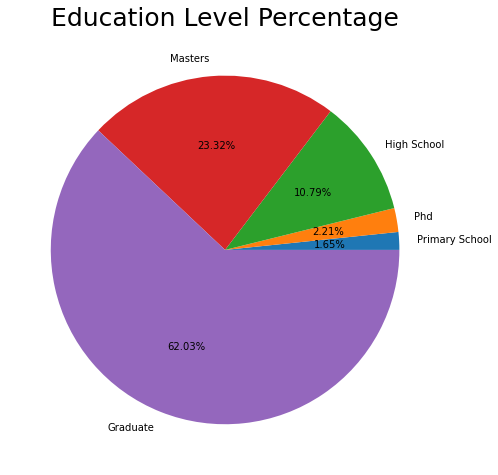

In [55]:
print("Number of Missing Values:", hr['education_level'].isna().sum())

values = list(hr_target['education_level'].value_counts().sort_values().values)
labels = list(hr_target['education_level'].value_counts().sort_values().index)
# explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, #explode = explode,
        autopct=lambda p:f'{p:.2f}%') #startangle=90
plt.title('Education Level Percentage', fontsize = 25)
plt.tight_layout()
plt.show()

# our data of relevant experience is imbalanced

__The data contain graduate candidates the most. Apparently, graduates were the most enthusiastic about participating in the training held by the company__

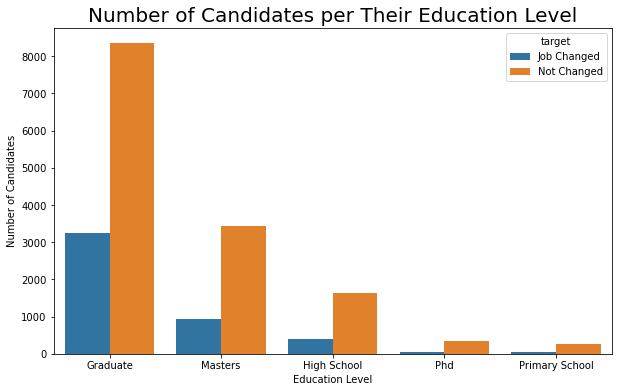

In [19]:
plt.figure(figsize=(10,6))
exp = sns.countplot(x = 'education_level', hue = hr_target['target'], data = hr_target, order = hr_target['education_level'].value_counts().index)
# plt.annotate()
exp.set_ylabel('Number of Candidates')
exp.set_xlabel('Education Level')
exp.set_title('Number of Candidates per Their Education Level', fontsize=20)
# plt.xticks(rotation=45)
plt.show()



__It can be seen from the graph that graduate candidates change jobs the most. Apparently, there are certain factors that cause this group to change their jobs frequently.__

### __Major Discipline__
__[Categorical Variable](https://www.formpl.us/blog/categorical-data)__

Number of Missing Values: 2813


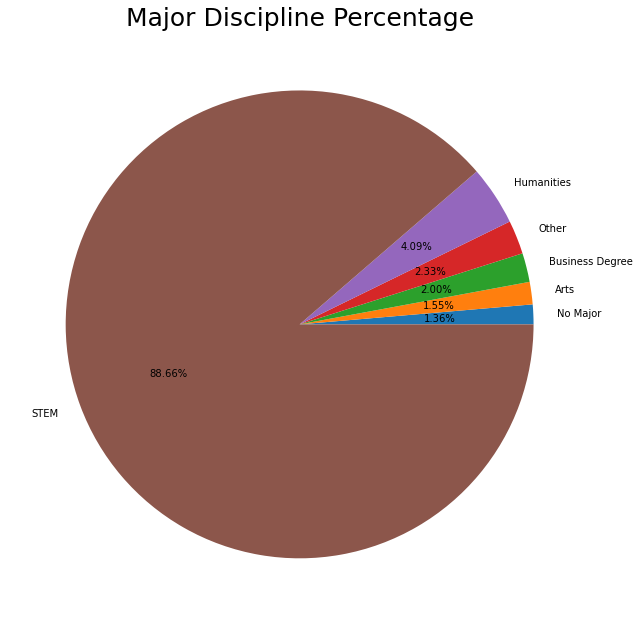

In [61]:
print("Number of Missing Values:", hr['major_discipline'].isna().sum())

values = list(hr_target['major_discipline'].value_counts().sort_values().values)
labels = list(hr_target['major_discipline'].value_counts().sort_values().index)
# explode = [0.15, 0.1, 0.15, 0.1, 0.1, 0.1]

plt.figure(figsize=(9,9))
plt.pie(values, labels=labels, #explode = explode,
        autopct=lambda p:f'{p:.2f}%') #startangle=90,
plt.title('Major Discipline Percentage', fontsize = 25)
plt.tight_layout()
plt.show()



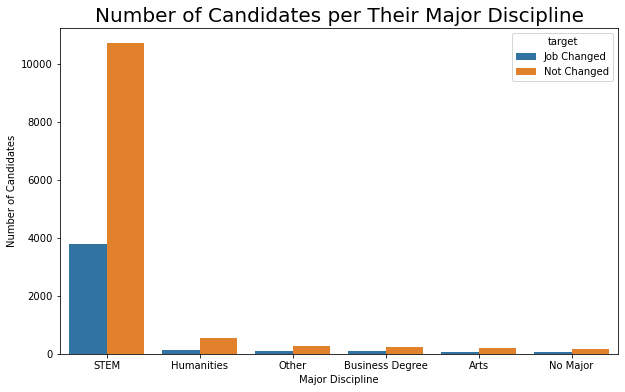

In [20]:
plt.figure(figsize=(10,6))
exp = sns.countplot(x = 'major_discipline', hue = hr_target['target'], data = hr_target, order = hr_target['major_discipline'].value_counts().index)
# plt.annotate()
exp.set_ylabel('Number of Candidates')
exp.set_xlabel('Major Discipline')
exp.set_title('Number of Candidates per Their Major Discipline', fontsize=20)
# plt.xticks(rotation=45)
plt.show()



### __Experience__
__[Ordinal Variable](https://web.ma.utexas.edu/users/mks/statmistakes/ordinal.html#:~:text=An%20ordinal%20variable%20is%20a,2:%20High%20school%20graduate)__

Number of Missing Values: 65


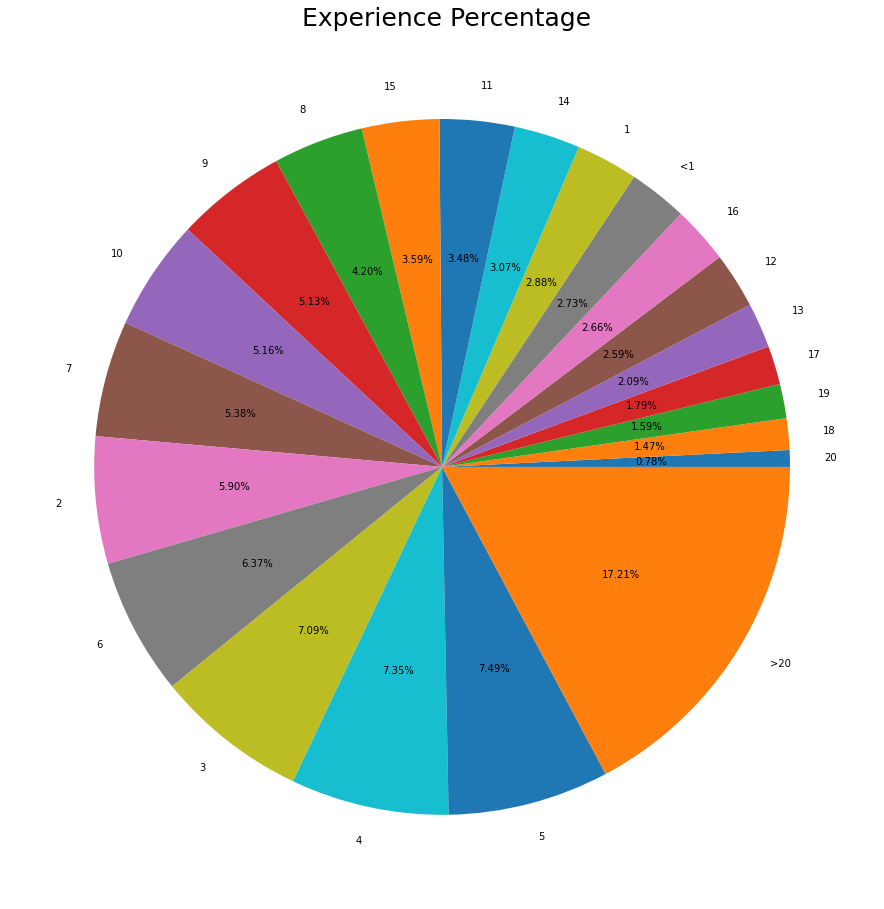

In [21]:
print("Number of Missing Values:", hr['experience'].isna().sum())

values = list(hr_target['experience'].value_counts().sort_values().values)
labels = list(hr_target['experience'].value_counts().sort_values().index)


plt.figure(figsize=(16,16))
plt.pie(values, labels=labels, 
        autopct=lambda p:f'{p:.2f}%')
plt.title(' Experience Percentage', fontsize = 25)

plt.show()



Number of Missing Values: 65


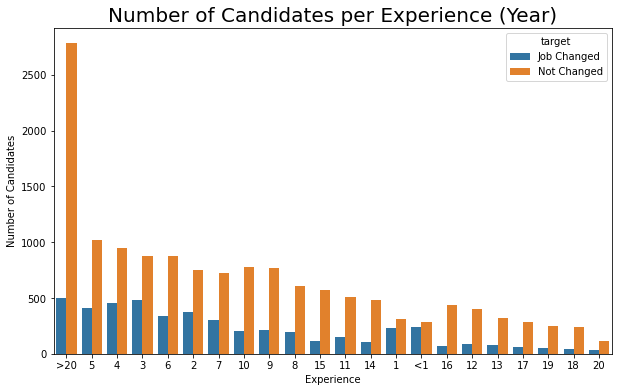

In [32]:
print("Number of Missing Values:", hr_target['experience'].isna().sum())

plt.figure(figsize=(10,6))
city = sns.countplot(x = 'experience', hue = hr_target['target'], data = hr_target, order = hr_target['experience'].value_counts().index)
# plt.annotate()
city.set_ylabel('Number of Candidates')
city.set_xlabel('Experience')
city.set_title('Number of Candidates per Experience (Year)', fontsize=20)
# plt.xticks(rotation=45)
plt.show()



### __Company Size__
__[Ordinal Variable](https://web.ma.utexas.edu/users/mks/statmistakes/ordinal.html#:~:text=An%20ordinal%20variable%20is%20a,2:%20High%20school%20graduate)__

Number of Missing Values: 5938


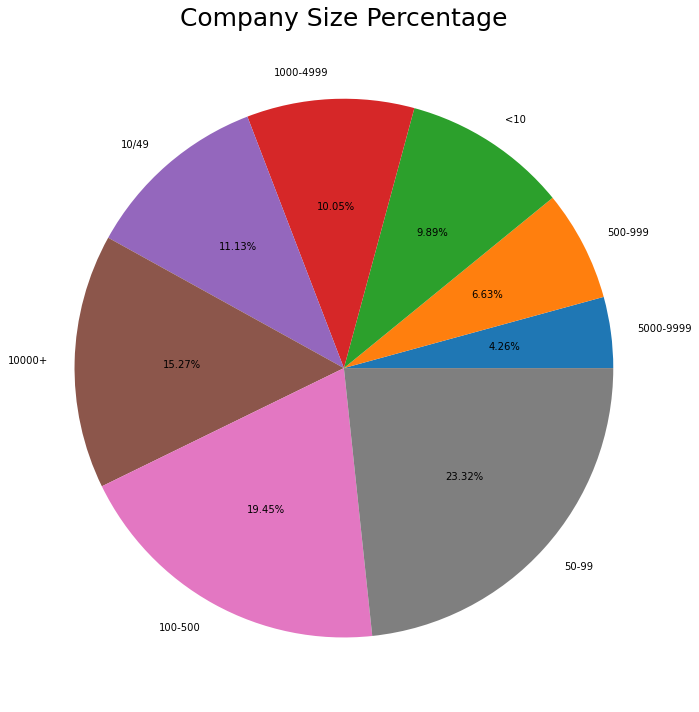

In [22]:
print("Number of Missing Values:", hr['company_size'].isna().sum())

values = list(hr_target['company_size'].value_counts().sort_values().values)
labels = list(hr_target['company_size'].value_counts().sort_values().index)

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,
        autopct=lambda p:f'{p:.2f}%')
plt.title('Company Size Percentage', fontsize = 25)
plt.tight_layout()
plt.show()



Number of Missing Values: 5938


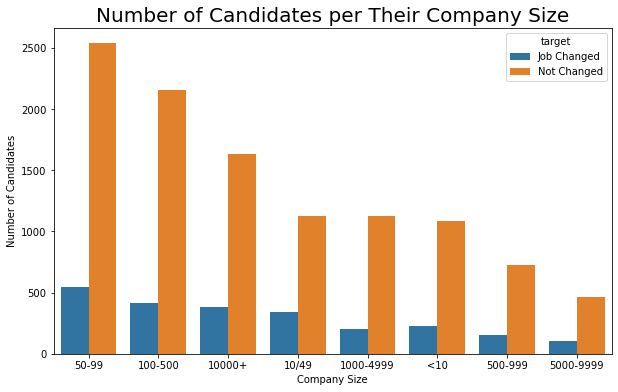

In [23]:
print("Number of Missing Values:", hr_target['company_size'].isna().sum())

plt.figure(figsize=(10,6))
city = sns.countplot(x = 'company_size', hue = hr_target['target'], data = hr_target, order = hr_target['company_size'].value_counts().index)
# plt.annotate()
city.set_ylabel('Number of Candidates')
city.set_xlabel('Company Size')
city.set_title('Number of Candidates per Their Company Size', fontsize=20)
# plt.xticks(rotation=45)
plt.show()

# the table showed us the biggest 5 cities of where the candidates came from

### __Company Type__
__[Categorical Variable](https://www.formpl.us/blog/categorical-data)__

Number of Missing Values: 6140


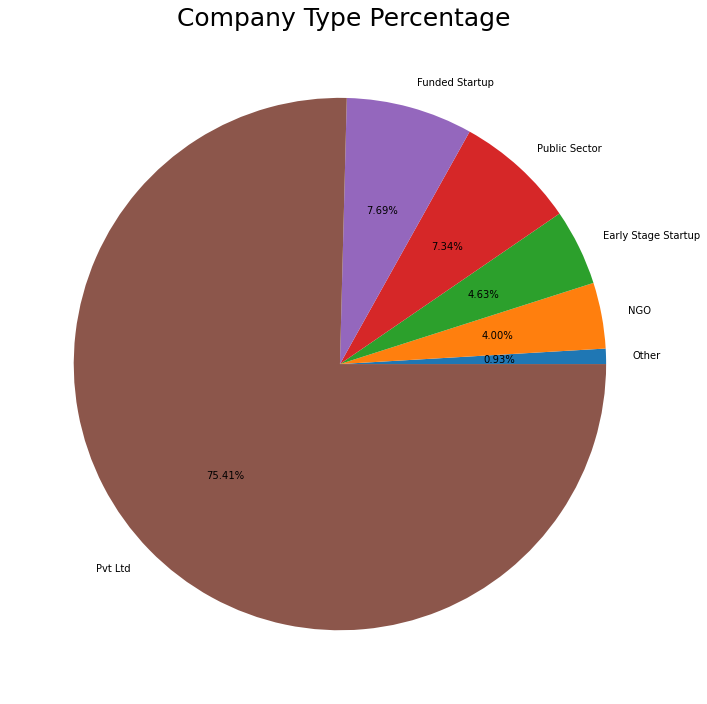

In [24]:
print("Number of Missing Values:", hr['company_type'].isna().sum())

values = list(hr_target['company_type'].value_counts().sort_values().values)
labels = list(hr_target['company_type'].value_counts().sort_values().index)


plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,
        autopct=lambda p:f'{p:.2f}%')
plt.title(' Company Type Percentage', fontsize = 25)
plt.tight_layout()
plt.show()



Number of Missing Values: 6140


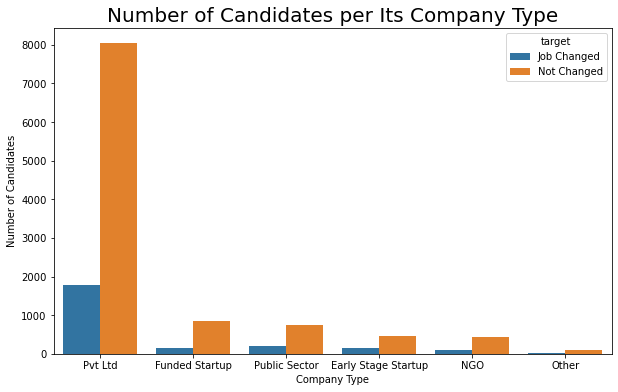

In [35]:
print("Number of Missing Values:", hr_target['company_type'].isna().sum())

plt.figure(figsize=(10,6))
city = sns.countplot(x = 'company_type', hue = hr_target['target'], data = hr_target, order = hr_target['company_type'].value_counts().index)
# plt.annotate()
city.set_ylabel('Number of Candidates')
city.set_xlabel('Company Type')
city.set_title('Number of Candidates per Its Company Type', fontsize=20)
# plt.xticks(rotation=45)
plt.show()



### __Last New Job__
__[Ordinal Variable](https://web.ma.utexas.edu/users/mks/statmistakes/ordinal.html#:~:text=An%20ordinal%20variable%20is%20a,2:%20High%20school%20graduate)__

Number of Missing Values: 423


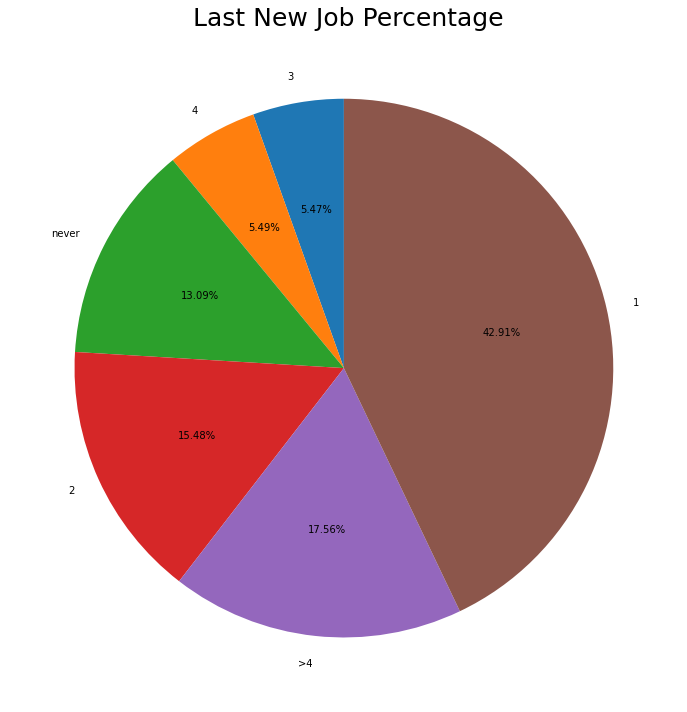

In [25]:
print("Number of Missing Values:", hr['last_new_job'].isna().sum())

values = list(hr_target['last_new_job'].value_counts().sort_values().values)
labels = list(hr_target['last_new_job'].value_counts().sort_values().index)


plt.figure(figsize=(10,10))
plt.pie(values, labels=labels, 
        startangle=90, autopct=lambda p:f'{p:.2f}%')
plt.title(' Last New Job Percentage', fontsize = 25)
plt.tight_layout()
plt.show()



Number of Missing Values: 423


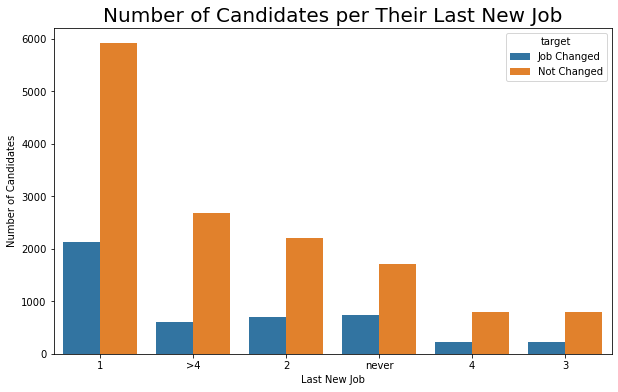

In [26]:
print("Number of Missing Values:", hr_target['last_new_job'].isna().sum())

plt.figure(figsize=(10,6))
city = sns.countplot(x = 'last_new_job', hue = hr_target['target'], data = hr_target, order = hr_target['last_new_job'].value_counts().index)
# plt.annotate()
city.set_ylabel('Number of Candidates')
city.set_xlabel('Last New Job')
city.set_title('Number of Candidates per Their Last New Job', fontsize=20)
# plt.xticks(rotation=45)
plt.show()



### __Training Hours__
__[Continuous Variable](https://www.sciencedirect.com/topics/computer-science/continuous-variable)__

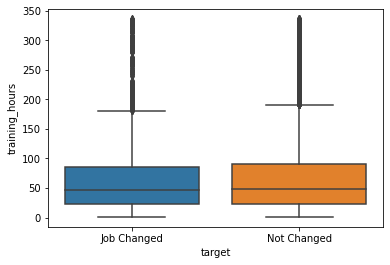

In [38]:
sns.boxplot(x=hr_target['target'], y=hr_target['training_hours'])
plt.show()

__Well from this graph, it can see that the number of hours used to train a candidate don't actually contribute a lot to the decision to change the fields for the candidate.
It can also be seen that the average amount of time for the course given to the candidates is around 46-48 hrs.__

Number of Missing Values: 0


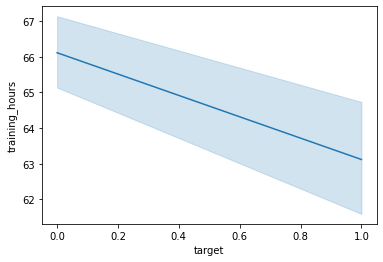

In [39]:
print("Number of Missing Values:", hr['training_hours'].isna().sum())

sns.lineplot(x='target', y='training_hours',data=hr)
plt.show() 


Number of Missing Values: 0


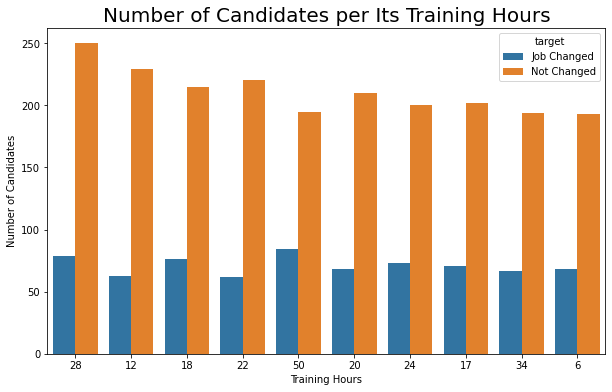

In [40]:
print("Number of Missing Values:", hr_target['training_hours'].isna().sum())

plt.figure(figsize=(10,6))
city = sns.countplot(x = 'training_hours', hue = hr_target['target'], data = hr_target, 
                     order = hr_target['training_hours'].value_counts().index[:10])
# plt.annotate()
city.set_ylabel('Number of Candidates')
city.set_xlabel('Training Hours')
city.set_title('Number of Candidates per Its Training Hours', fontsize=20)
# plt.xticks(rotation=45)
plt.show()



**Between feature**

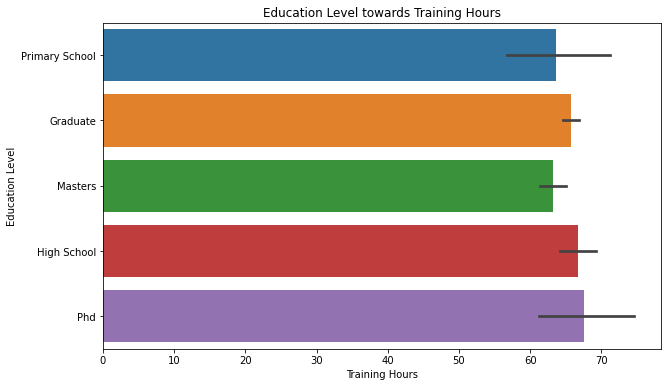

In [42]:
a = hr.sort_values(by='training_hours', ascending=True)
fig = plt.figure(figsize=(10,6))
sns.barplot(y=a.education_level, x=a.training_hours)
plt.xticks()
plt.xlabel('Training Hours')
plt.ylabel('Education Level')
plt.title('Education Level towards Training Hours')
plt.show()

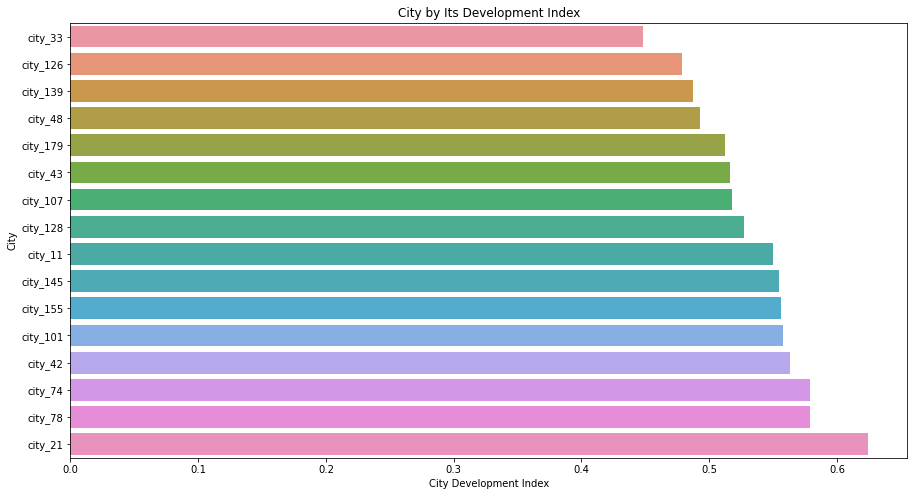

In [43]:
b = hr.sort_values(by='city_development_index', ascending=True)[:3000]
fig = plt.figure(figsize=(15,8))
sns.barplot(y=b.city, x=b.city_development_index)
plt.xticks()
plt.xlabel('City Development Index')
plt.ylabel('City')
plt.title('City by Its Development Index')
plt.show()

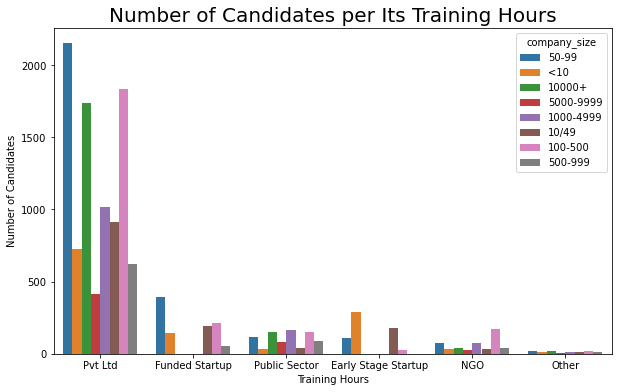

In [46]:
plt.figure(figsize=(10,6))
city = sns.countplot(x = 'company_type', hue = hr_target['company_size'], data = hr_target, 
                     order = hr_target['company_type'].value_counts().index)
# plt.annotate()
city.set_ylabel('Number of Candidates')
city.set_xlabel('Training Hours')
city.set_title('Number of Candidates per Its Training Hours', fontsize=20)
# plt.xticks(rotation=45)
plt.show()

# the table showed us the biggest 5 cities of where the candidates came from

# __Business Insights__

1. The company should be aware of candidates from certain conditions, especially since they tend to alter their occupations, such as:
    * If they are from city_21 and city_103,
    * If they have relevant experience,
    * If their education level is graduate,
    * If their major discipline is STEM
    * If their company type is from Pvt Ltd
    * If their last new job is just 1 year
<br>
1. If the company's willing to keep certain individuals from altering their occupations, the focus should be more concerned about well beings of said individuals in order to reduce or eliminate the chance of that said individuals altering their occupations. The method works better for males, as they tend to provide for their families.
